In [31]:
%matplotlib inline
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
from pylab import *
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import MultipleLocator
from sklearn import linear_model

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.kernel_ridge import KernelRidge
from sklearn.naive_bayes import GaussianNB
from collections import OrderedDict
from sklearn import mixture
from sklearn import cluster, preprocessing, mixture 
#　データセット読み込み
df = pd.read_csv('Perovskite_Water_Splitting.csv')
df = df.rename(columns={'B1_mole': 'B1 mole'})
df_per = pd.read_csv('periodictable.csv')

In [32]:
df

,Ref,A,A1,A2,B,B1,B2,X,X1,A mole,A1 mole,A2 mole,B mole,B1 mole,B2 mole,X mole,X1 mole,Prep Meth,CalcT(K),Calc time(h),Prom Meth,Promoter,Prom %w,Crystal,BandGap(eV),Surface Area(m2/g),CatW,Alcohol%,Sac. Agent1,Sac. Agent2,Light type,Power(W),Wave length(<nm),ProdRate(μmol/gh),Label
0,[S1],Sr,non,non,Ti,non,non,O,non,0.478,NaN,NaN,0.261,NaN,NaN,0.262,NaN,flux,1373.0,10.0,impreg,Rh,0.1,cubic,3.20,0.9,1.0,0.0,NaN,NaN,Xe,300.0,300.0,540.00,SrTiO
1,[S1],Sr,non,non,Ti,non,non,O,non,0.478,NaN,NaN,0.261,NaN,NaN,0.262,NaN,flux,1273.0,10.0,impreg,Rh,0.1,cubic,3.20,1.3,1.0,0.0,NaN,NaN,Xe,300.0,300.0,540.00,SrTiO
2,[S1],Sr,non,non,Ti,non,non,O,non,0.478,NaN,NaN,0.261,NaN,NaN,0.262,NaN,flux,1173.0,10.0,impreg,Rh,0.1,cubic,3.20,1.9,1.0,0.0,NaN,NaN,Xe,300.0,300.0,32.00,SrTiO
3,[S1],Sr,non,non,Ti,Al,non,O,non,0.477,NaN,NaN,0.261,0.0001,NaN,0.262,NaN,flux,1273.0,10.0,impreg,Rh,0.1,cubic,3.20,0.9,1.0,0.0,NaN,NaN,Xe,300.0,300.0,40.00,SrTiAlO
4,[S1],Sr,non,non,Ti,Al,non,O,non,0.477,NaN,NaN,0.260,0.0010,NaN,0.261,NaN,flux,1273.0,10.0,impreg,Rh,0.1,cubic,3.20,2.7,1.0,0.0,NaN,NaN,Xe,300.0,300.0,380.00,SrTiAlO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,[S151],La,non,non,Co,non,non,O,non,0.565,NaN,NaN,0.240,NaN,NaN,0.195,NaN,SSR,1073.0,2.0,NaN,NaN,NaN,rhombohedral,1.42,NaN,1.0,0.0,CH2O,NaN,Xe,500.0,NaN,14.37,LaCoO
536,[S151],La,non,non,Co,non,non,O,non,0.565,NaN,NaN,0.240,NaN,NaN,0.195,NaN,SSR,773.0,2.0,NaN,Au,0.1,rhombohedral,1.42,NaN,1.0,0.0,CH2O,NaN,Xe,500.0,NaN,22.75,LaCoO
537,[S151],La,non,non,Co,non,non,O,non,0.565,NaN,NaN,0.240,NaN,NaN,0.195,NaN,SSR,773.0,2.0,NaN,Au,0.5,rhombohedral,1.42,NaN,1.0,0.0,CH2O,NaN,Xe,500.0,NaN,33.53,LaCoO
538,[S151],La,non,non,Co,non,non,O,non,0.565,NaN,NaN,0.240,NaN,NaN,0.195,NaN,SG,773.0,2.0,NaN,Au,1.0,rhombohedral,1.42,NaN,1.0,0.0,CH2O,NaN,Xe,500.0,NaN,28.74,LaCoO


In [30]:
######化学式で分類して各行をLabelで分類できるようにする

df.loc[:,"A":"X1"] = df.loc[:,"A":"X1"].fillna(value = 'non')#.drop_duplicates()
df["Label"] = df.loc[:,"A":"X1"].sum(axis = 1)

df["Label"] = [a.replace("non","") for a in df["Label"]]
df.drop(["Unnamed: 0", "Unnamed: 0.1", "Unnamed: 0.1.1", "Unnamed: 0.1.1.1" ],axis = 1,inplace = True)
df.to_csv("/home/student/water_splitting/Perovskite_Water_Splitting.csv",index = False)
df

,Ref,A,A1,A2,B,B1,B2,X,X1,A mole,A1 mole,A2 mole,B mole,B1 mole,B2 mole,X mole,X1 mole,Prep Meth,CalcT(K),Calc time(h),Prom Meth,Promoter,Prom %w,Crystal,BandGap(eV),Surface Area(m2/g),CatW,Alcohol%,Sac. Agent1,Sac. Agent2,Light type,Power(W),Wave length(<nm),ProdRate(μmol/gh),Label
0,[S1],Sr,non,non,Ti,non,non,O,non,0.478,NaN,NaN,0.261,NaN,NaN,0.262,NaN,flux,1373.0,10.0,impreg,Rh,0.1,cubic,3.20,0.9,1.0,0.0,NaN,NaN,Xe,300.0,300.0,540.00,SrTiO
1,[S1],Sr,non,non,Ti,non,non,O,non,0.478,NaN,NaN,0.261,NaN,NaN,0.262,NaN,flux,1273.0,10.0,impreg,Rh,0.1,cubic,3.20,1.3,1.0,0.0,NaN,NaN,Xe,300.0,300.0,540.00,SrTiO
2,[S1],Sr,non,non,Ti,non,non,O,non,0.478,NaN,NaN,0.261,NaN,NaN,0.262,NaN,flux,1173.0,10.0,impreg,Rh,0.1,cubic,3.20,1.9,1.0,0.0,NaN,NaN,Xe,300.0,300.0,32.00,SrTiO
3,[S1],Sr,non,non,Ti,Al,non,O,non,0.477,NaN,NaN,0.261,0.0001,NaN,0.262,NaN,flux,1273.0,10.0,impreg,Rh,0.1,cubic,3.20,0.9,1.0,0.0,NaN,NaN,Xe,300.0,300.0,40.00,SrTiAlO
4,[S1],Sr,non,non,Ti,Al,non,O,non,0.477,NaN,NaN,0.260,0.0010,NaN,0.261,NaN,flux,1273.0,10.0,impreg,Rh,0.1,cubic,3.20,2.7,1.0,0.0,NaN,NaN,Xe,300.0,300.0,380.00,SrTiAlO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,[S151],La,non,non,Co,non,non,O,non,0.565,NaN,NaN,0.240,NaN,NaN,0.195,NaN,SSR,1073.0,2.0,NaN,NaN,NaN,rhombohedral,1.42,NaN,1.0,0.0,CH2O,NaN,Xe,500.0,NaN,14.37,LaCoO
536,[S151],La,non,non,Co,non,non,O,non,0.565,NaN,NaN,0.240,NaN,NaN,0.195,NaN,SSR,773.0,2.0,NaN,Au,0.1,rhombohedral,1.42,NaN,1.0,0.0,CH2O,NaN,Xe,500.0,NaN,22.75,LaCoO
537,[S151],La,non,non,Co,non,non,O,non,0.565,NaN,NaN,0.240,NaN,NaN,0.195,NaN,SSR,773.0,2.0,NaN,Au,0.5,rhombohedral,1.42,NaN,1.0,0.0,CH2O,NaN,Xe,500.0,NaN,33.53,LaCoO
538,[S151],La,non,non,Co,non,non,O,non,0.565,NaN,NaN,0.240,NaN,NaN,0.195,NaN,SG,773.0,2.0,NaN,Au,1.0,rhombohedral,1.42,NaN,1.0,0.0,CH2O,NaN,Xe,500.0,NaN,28.74,LaCoO


In [33]:
######　組合せの種類を見つけ出す。
######　それぞれの組合せでの値(散布図)を表示させる。(例：色を変えて一つの図にプロット?)
######　組合せごとの傾向が見れるかもしれない。


######　組合せの種類を見つけ出す。
######　元素記号をkeyにして各元素のLavelのlistをvalueにもつ辞書を作っておくと便利??
set(df['A'])
dic_A_label_list = {}
for i in set(df['A']):
    print(i, df[df["A"] == i].drop_duplicates(subset = 'Label')['Label'])
    dic_A_label_list[i] = list(df[df["A"] == i].drop_duplicates(subset = 'Label')['Label'])
#dic_A_label_list    


Ag 381    AgTaO
382    AgNbO
421    AgSbO
Name: Label, dtype: object
Ca 96         CaInS
137     CaTaZrON
289        CaTaO
415        CaTiO
452      CaTaZrO
487    CaLaTiCrO
Name: Label, dtype: object
Bi 113      BiNaTiO
143       BiTiON
164      BiSrNbO
165      BiBaNbO
166      BiCaNbO
184     BiKLaTaO
189        BiTaO
194      BiCaTaO
199      BiBaTaO
233    BiLaNbAlO
251      BiTaCuO
275      BiSrTaO
412        BiFeO
Name: Label, dtype: object
Ga 373    GaInO
449    GaFeO
Name: Label, dtype: object
Zn 22       ZnInS
23     ZnAgInS
62       ZnCdS
76       ZnTiS
302      ZnGaO
494    ZnCuCdS
Name: Label, dtype: object
Ba 71         BaZrO
72       BaZrSnO
309      BaNbTaO
310        BaTaO
311        BaNbO
312      BaInTaO
350       BaTaON
392      BaZnNbO
395      BaNiNbO
396      BaNiTaO
402      BaNbCoO
416        BaTiO
433      BaSnZrO
441      BaTaZrO
503    BaLaTiCrO
Name: Label, dtype: object
K 28     KCaSrTaO
53         KTaO
55         KNbO
112    KLaTaBiO
155      KSnTiO
173  

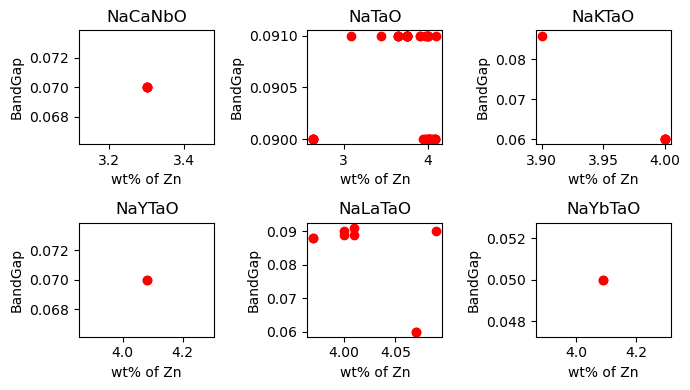

In [34]:
#####　Znを例にしてそれぞれの組合せごとに傾向を見てみる
fig, ax =  subplots(2,3, figsize = (7,4), dpi = 100, tight_layout = True)
for i,j in zip(ax.flatten(), dic_A_label_list["Na"]):
    i.scatter(df[df['Label'] == j]["BandGap(eV)"], df[df['Label'] == j]["A mole"], c = 'r')
    i.set(xlabel = "wt% of Zn", ylabel = "BandGap",title = j)
    


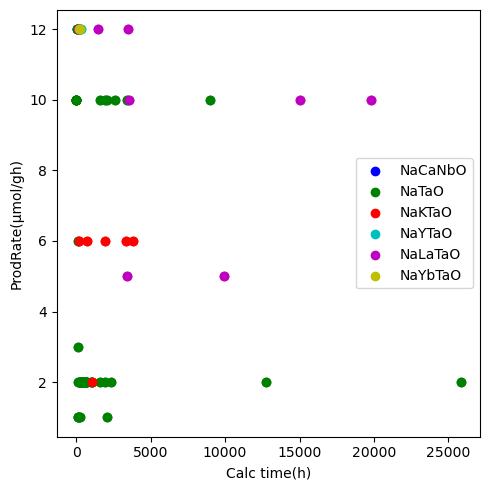

In [36]:
###### 1つの散布図にLabelごとに色を変えてscatter
color_lis = ["b","g","r","c","m","y"]
fig, ax =  subplots(1,1, figsize = (5,5), dpi = 100, tight_layout = True)

x_data = [df[df['Label'] == j]["ProdRate(μmol/gh)"] for j in dic_A_label_list["Na"]]
y_data = [df[df['Label'] == j]["Calc time(h)"] for j in dic_A_label_list["Na"]]

for j,i in zip(dic_A_label_list["Na"], color_lis):
    ax.scatter(df[df['Label'] == j]["ProdRate(μmol/gh)"],df[df['Label'] == j]["Calc time(h)"], c = i)
    ax.set(xlabel = "Calc time(h)", ylabel = "ProdRate(μmol/gh)")
scatters = [ax.scatter(df[df['Label'] == j]["ProdRate(μmol/gh)"],df[df['Label'] == j]["Calc time(h)"], c = i) for j,i in zip(dic_A_label_list["Na"], color_lis)]
ax.legend(handles = scatters,
         labels = [j for j in dic_A_label_list["Na"]],)

In [46]:
###### 関数化
def scatter_each_Label(A_site, target, param):
    fig, ax =  subplots(1,1, figsize = (10,10), dpi = 100, tight_layout = True)
    for j,i in zip(dic_A_label_list[A_site], range(len(dic_A_label_list[A_site]))):
        ax.scatter(df[df['Label'] == j][target],df[df['Label'] == j][param], c = [matplotlib.cm.tab20(i)])
        ax.set(xlabel = param, ylabel = target)
    scatters = [ax.scatter(df[df['Label'] == j][target],df[df['Label'] == j][param], c = [matplotlib.cm.tab20(i)]) for j,i in zip(dic_A_label_list[A_site], range(len(dic_A_label_list[A_site])))]
    ax.legend(handles = scatters,
             labels = [j for j in dic_A_label_list[A_site]],)

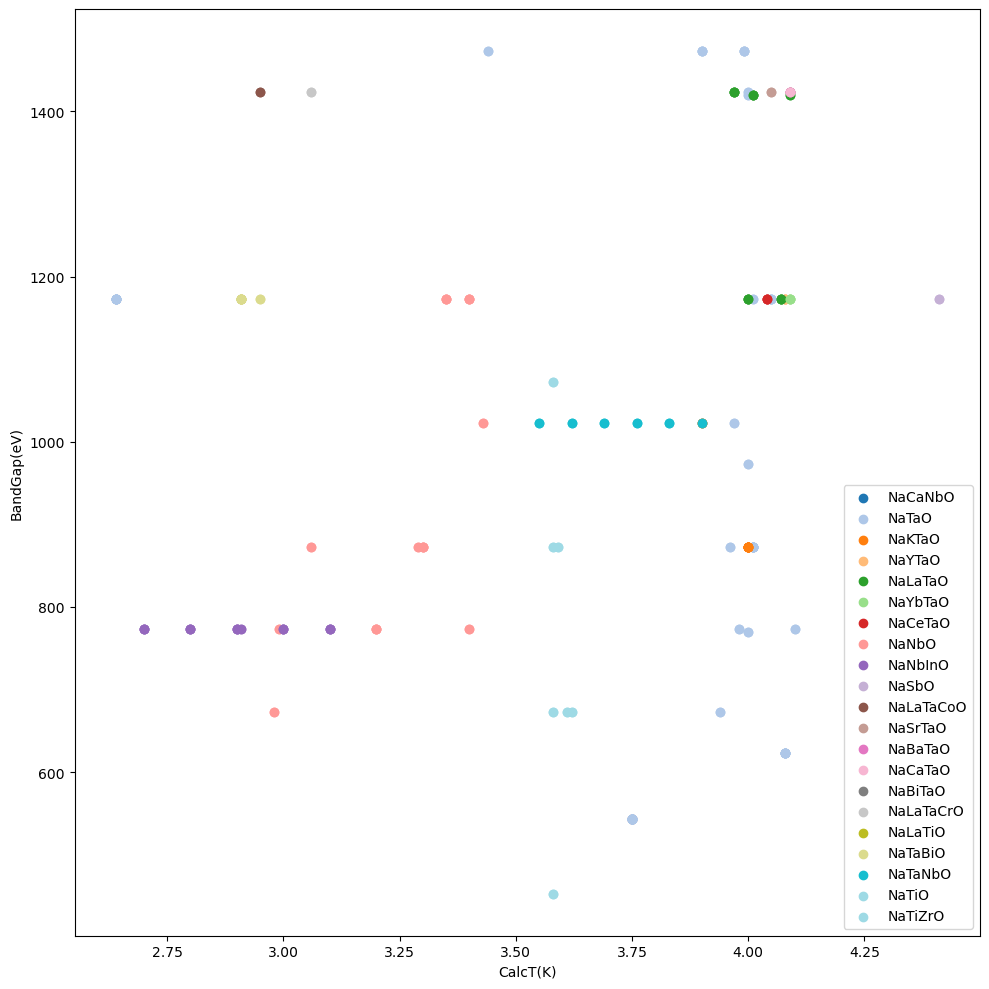

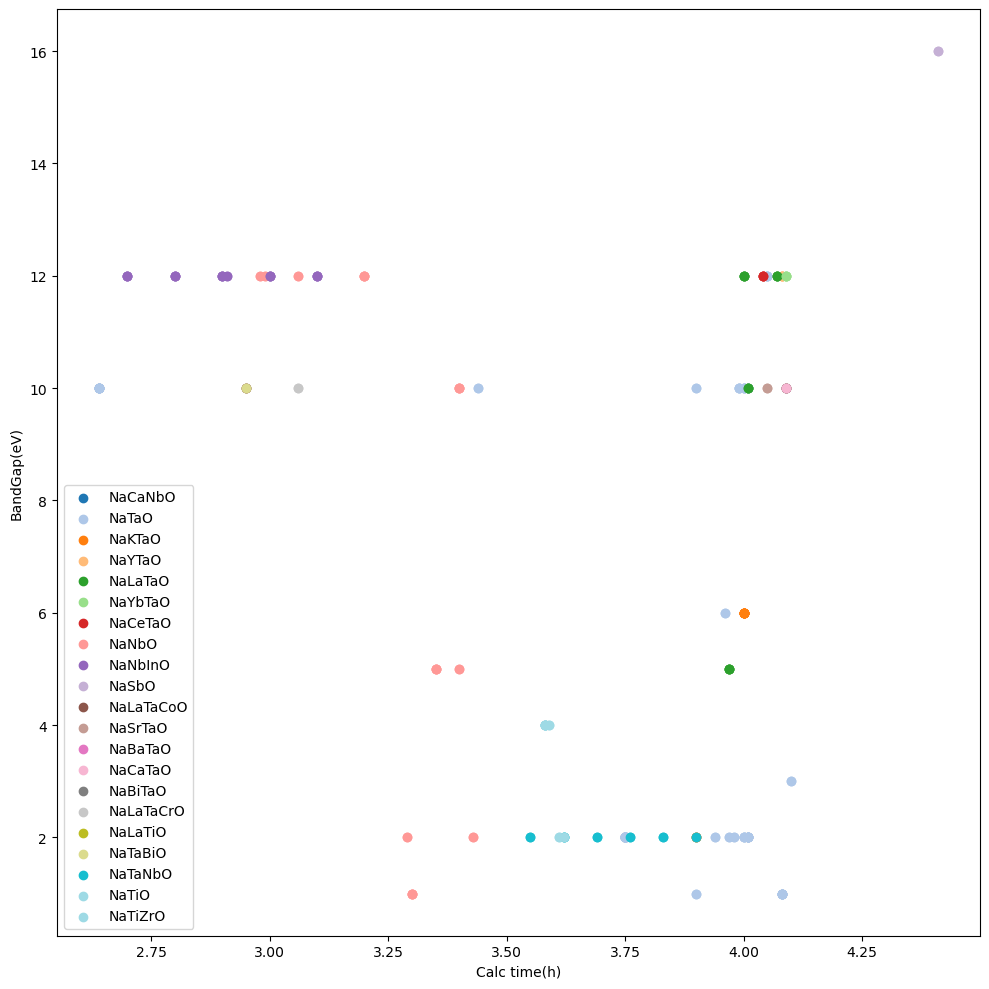

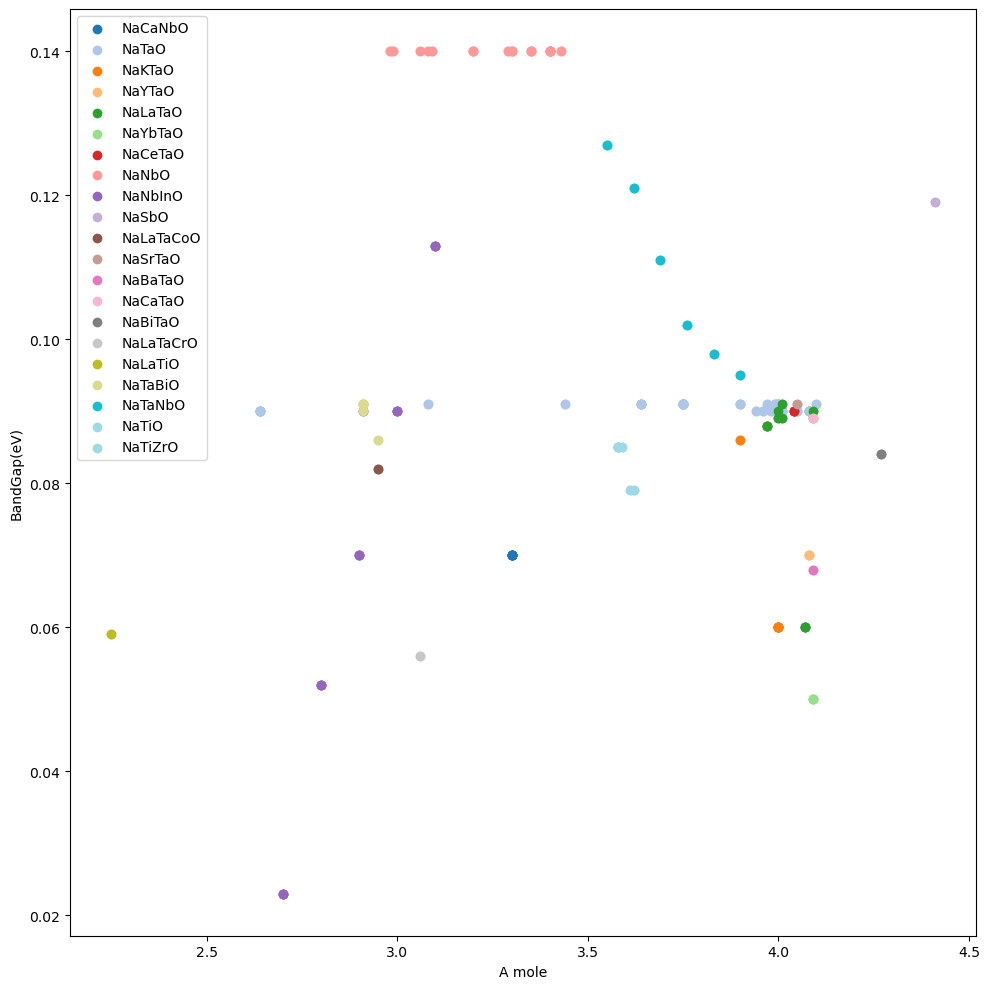

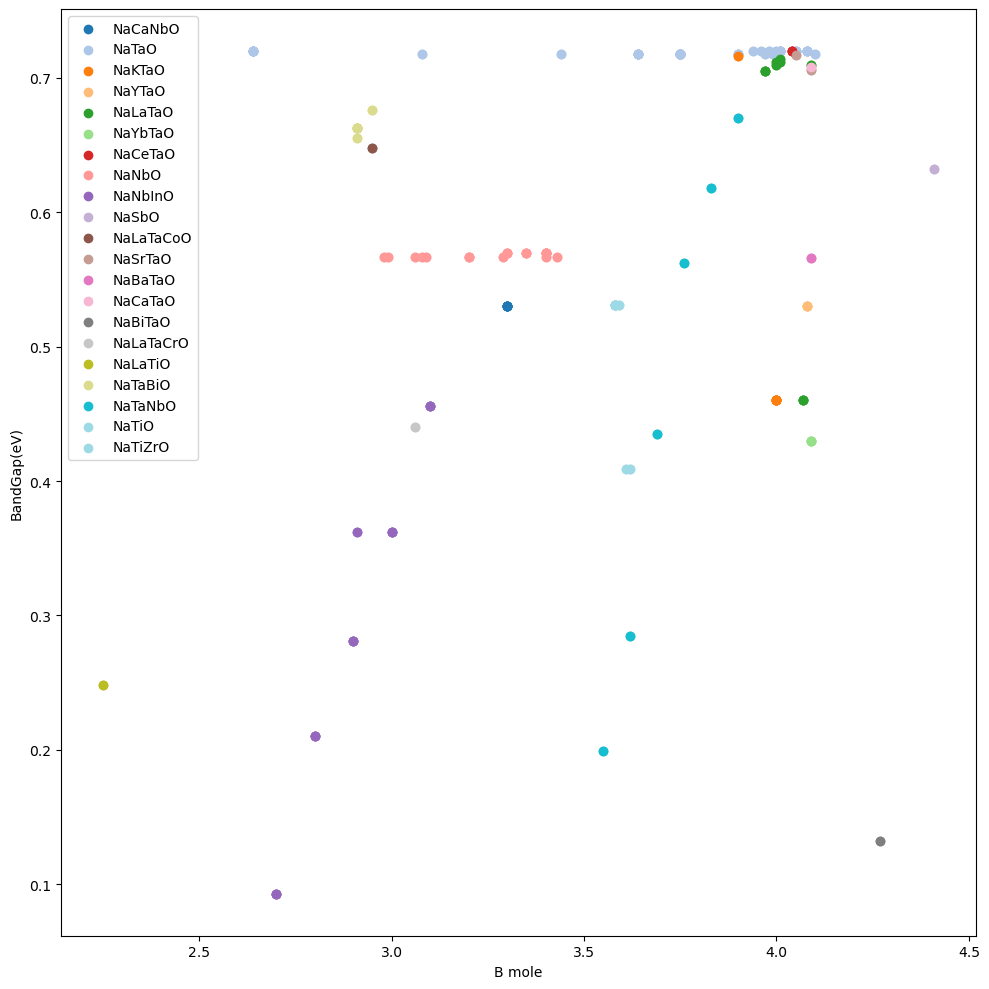

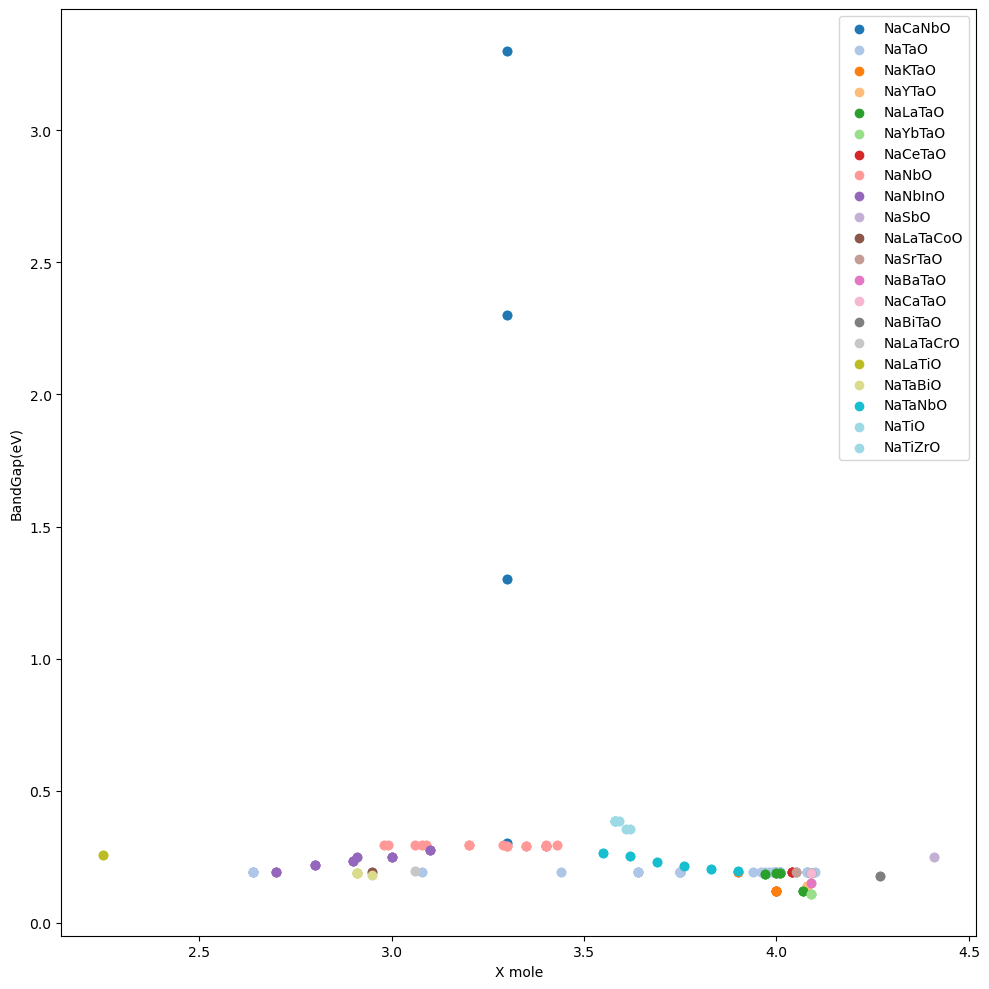

In [49]:
for i in ["CalcT(K)", "Calc time(h)", "A mole", "B mole","X mole"]:
    scatter_each_Label("Na", "BandGap(eV)", i)

In [91]:
#####　Znを例にしてそれぞれの組合せごとに傾向を見てみる
#####  ほかもみたい→　ループでやる

def BandGap_wt(df,atom_name):
    fig, ax =  subplots(int(len(list(dic_A_label_list[atom_name]))) // 3 + 1, 3,figsize = (7,14), dpi = 100, tight_layout = True)
    for i,j in zip(ax.flatten(), dic_A_label_list[atom_name]):
        if len(list(df[df['Label'] == j])) > 3:
            i.scatter(df[df['Label'] == j]["BandGap(eV)"], df[df['Label'] == j]["A mole"],c = 'r')
            i.set(xlabel = "wt% of "+ atom_name, ylabel = "BandGap(eV)",title = j)
        
    else:
        None

#fig, ax =  subplots(2,3, figsize = (7,4), dpi = 100, tight_layout = True)
#for i,j in zip(ax.flatten(), dic_A_label_list["Zn"]):
    #i.scatter(df[df['Label'] == j]["BandGap(eV)"], df[df['Label'] == j]["A mole"], c = 'r')
    #i.set(xlabel = "wt% of Zn", ylabel = "BandGap",title = j)
dic_A_label_list.keys()    

dict_keys(['Ga', 'Y', 'Sr', 'Li', 'Ca', 'Mn', 'Sm', 'Cu', 'K', 'Cr', 'Ag', 'Zn', 'Co', 'Ba', 'Ni', 'Bi', 'In', 'Sb', 'Na', 'La'])

/tmp/ipykernel_8219/1621465455.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1[df['A'] == 'Na']


,Unnamed: 0,Ref,A,A1,A2,B,B1,B2,X,X1,A mole,A1 mole,A2 mole,B mole,B1 mole,B2 mole,X mole,X1 mole,Prep Meth,CalcT(K),Calc time(h),Prom Meth,Promoter,Prom %w,Crystal,BandGap(eV),Surface Area(m2/g),CatW,Alcohol%,Sac. Agent1,Sac. Agent2,Light type,Power(W),Wave length(<nm),ProdRate(μmol/gh),Label
118,118,[S20],Na,non,non,Ta,non,non,O,NaN,0.090,NaN,NaN,0.720,NaN,NaN,0.190,NaN,HT,1173.0,10.0,NaN,NaN,NaN,cubic,2.64,1.22,0.5,20.0,NaN,NaN,Xe,800.0,390.0,0.08,[S20]NaTa
119,119,[S20],Na,non,non,Ta,non,non,O,NaN,0.090,NaN,NaN,0.720,NaN,NaN,0.190,NaN,HT,1173.0,10.0,impreg,Pt,0.03,cubic,2.64,1.22,0.5,20.0,NaN,NaN,Xe,800.0,390.0,0.58,[S20]NaTa
120,120,[S20],Na,non,non,Ta,non,non,O,NaN,0.090,NaN,NaN,0.720,NaN,NaN,0.190,NaN,HT,1173.0,10.0,impreg,Pt,0.06,cubic,2.64,1.22,0.5,20.0,NaN,NaN,Xe,800.0,390.0,1.00,[S20]NaTa
121,121,[S20],Na,non,non,Ta,non,non,O,NaN,0.090,NaN,NaN,0.720,NaN,NaN,0.190,NaN,SSR,1173.0,10.0,impreg,Pt,0.10,cubic,2.64,1.22,0.5,20.0,NaN,NaN,Xe,800.0,390.0,0.25,[S20]NaTa
122,122,[S20],Na,non,non,Ta,non,non,O,NaN,0.090,NaN,NaN,0.720,NaN,NaN,0.190,NaN,SSR,1173.0,10.0,impreg,Pt,0.13,cubic,2.64,1.22,0.5,20.0,NaN,NaN,Xe,800.0,390.0,0.16,[S20]NaTa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,480,[S143],Na,non,non,Ta,Nb,non,O,NaN,0.098,NaN,NaN,0.618,0.079,NaN,0.205,NaN,SSR,1023.0,2.0,NaN,NaN,NaN,orthorombic,3.83,NaN,1.0,10.0,NaN,NaN,Xe,300.0,400.0,1333.00,[S143]NaTaNb
481,481,[S143],Na,non,non,Ta,Nb,non,O,NaN,0.102,NaN,NaN,0.562,0.124,NaN,0.213,NaN,novel,1023.0,2.0,NaN,NaN,NaN,orthorombic,3.76,NaN,1.0,10.0,NaN,NaN,Xe,300.0,400.0,2000.00,[S143]NaTaNb
482,482,[S143],Na,non,non,Ta,Nb,non,O,NaN,0.111,NaN,NaN,0.435,0.223,NaN,0.231,NaN,novel,1023.0,2.0,NaN,NaN,NaN,orthorombic,3.69,NaN,1.0,10.0,NaN,NaN,Xe,300.0,400.0,2416.00,[S143]NaTaNb
483,483,[S143],Na,non,non,Ta,Nb,non,O,NaN,0.121,NaN,NaN,0.285,0.342,NaN,0.252,NaN,novel,1023.0,2.0,NaN,NaN,NaN,cubic,3.62,NaN,1.0,10.0,NaN,NaN,Xe,300.0,400.0,1583.00,[S143]NaTaNb


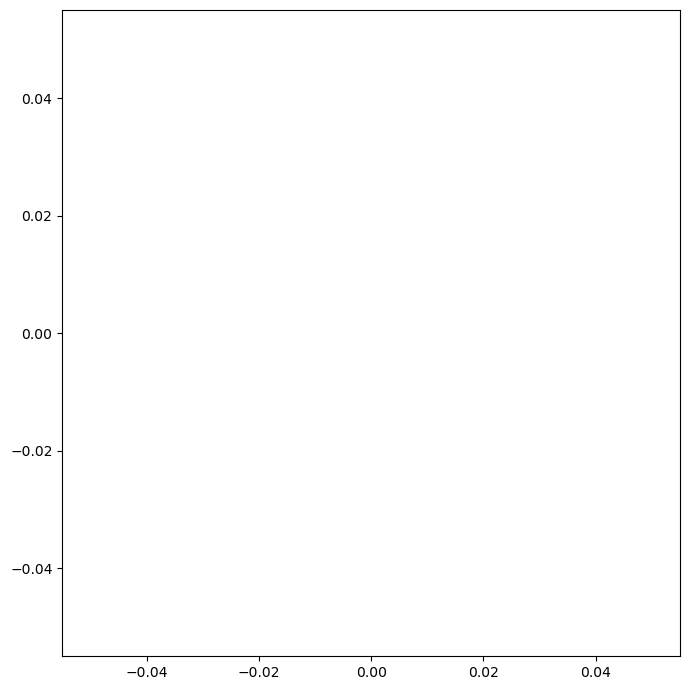

In [114]:
fig, ax =  subplots(1, 1,figsize = (7,7), dpi = 100, tight_layout = True)
ax.scatter(df[df['Label'] == 'NaTa']["BandGap(eV)"], df[df['Label'] == 'NaTa']["A mole"],c = 'r')
dic_A_label_list['Na']
df[df['Label'] == 'NaLaTa']
df1 = df[df['B'] == 'Ta']
df1[df['A'] == 'Na']

36

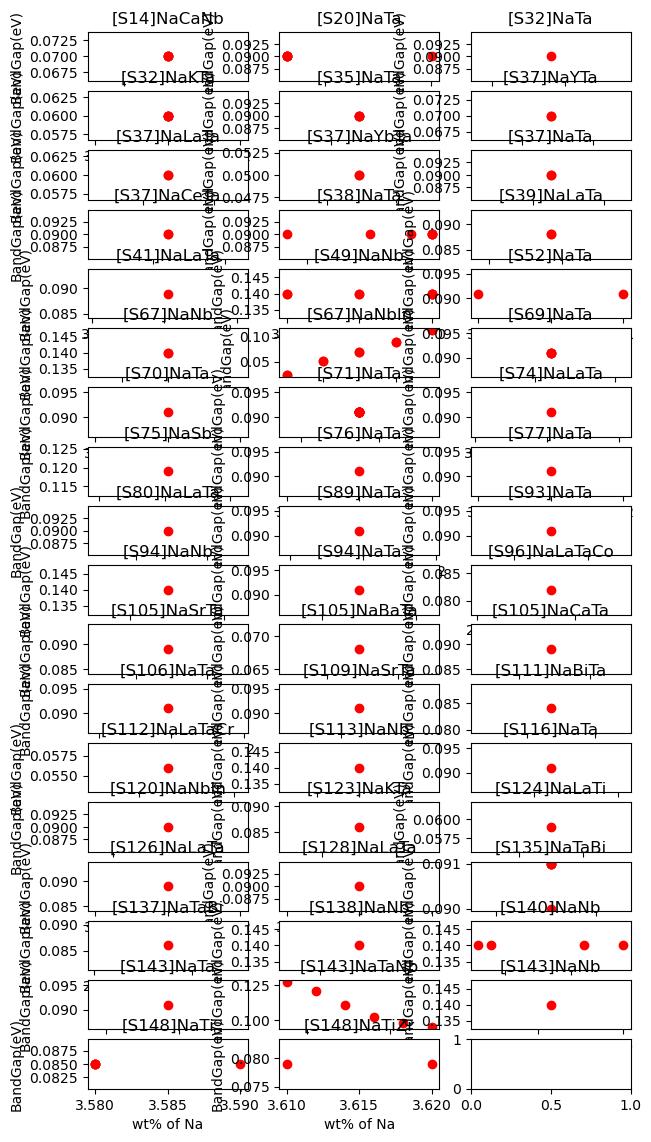

In [100]:
BandGap_wt(df,'Na')
#df[df["A"] == 'Ga']
#len(dic_A_label_list['Li'])
dic_A_label_list['Na']
len(list(df[df['Label'] == 'NaCaNb'].drop_duplicates(subset = "BandGap(eV)")))

In [71]:
###### 1つの散布図にLabelごとに色を変えてscatter
def A_scatter(df, metal_name, a):
    color_lis = list(matplotlib.colors.CSS4_COLORS)
    fig, ax =  subplots(1,1, figsize = (10,a), dpi = 100, tight_layout = True)

    x_data = [df[df['Label'] == j]["BandGap(eV)"] for j in dic_A_label_list[metal_name]]
    y_data = [df[df['Label'] == j]["A mole"] for j in dic_A_label_list[metal_name]]

    for j,i in zip(dic_A_label_list[metal_name], color_lis[8:]):
        ax.scatter(df[df['Label'] == j]["BandGap(eV)"],df[df['Label'] == j]["A mole"], c = i)
        ax.set(xlabel = "wt% of Sr", ylabel = "BandGap(eV)")
    
    scatters = [ax.scatter(df[df['Label'] == j]["BandGap(eV)"],df[df['Label'] == j]["A mole"], c = i) for j,i in zip(dic_A_label_list[metal_name], color_lis[8:])]
    ax.legend(handles = scatters,
             labels = [j for j in dic_A_label_list[metal_name]],)

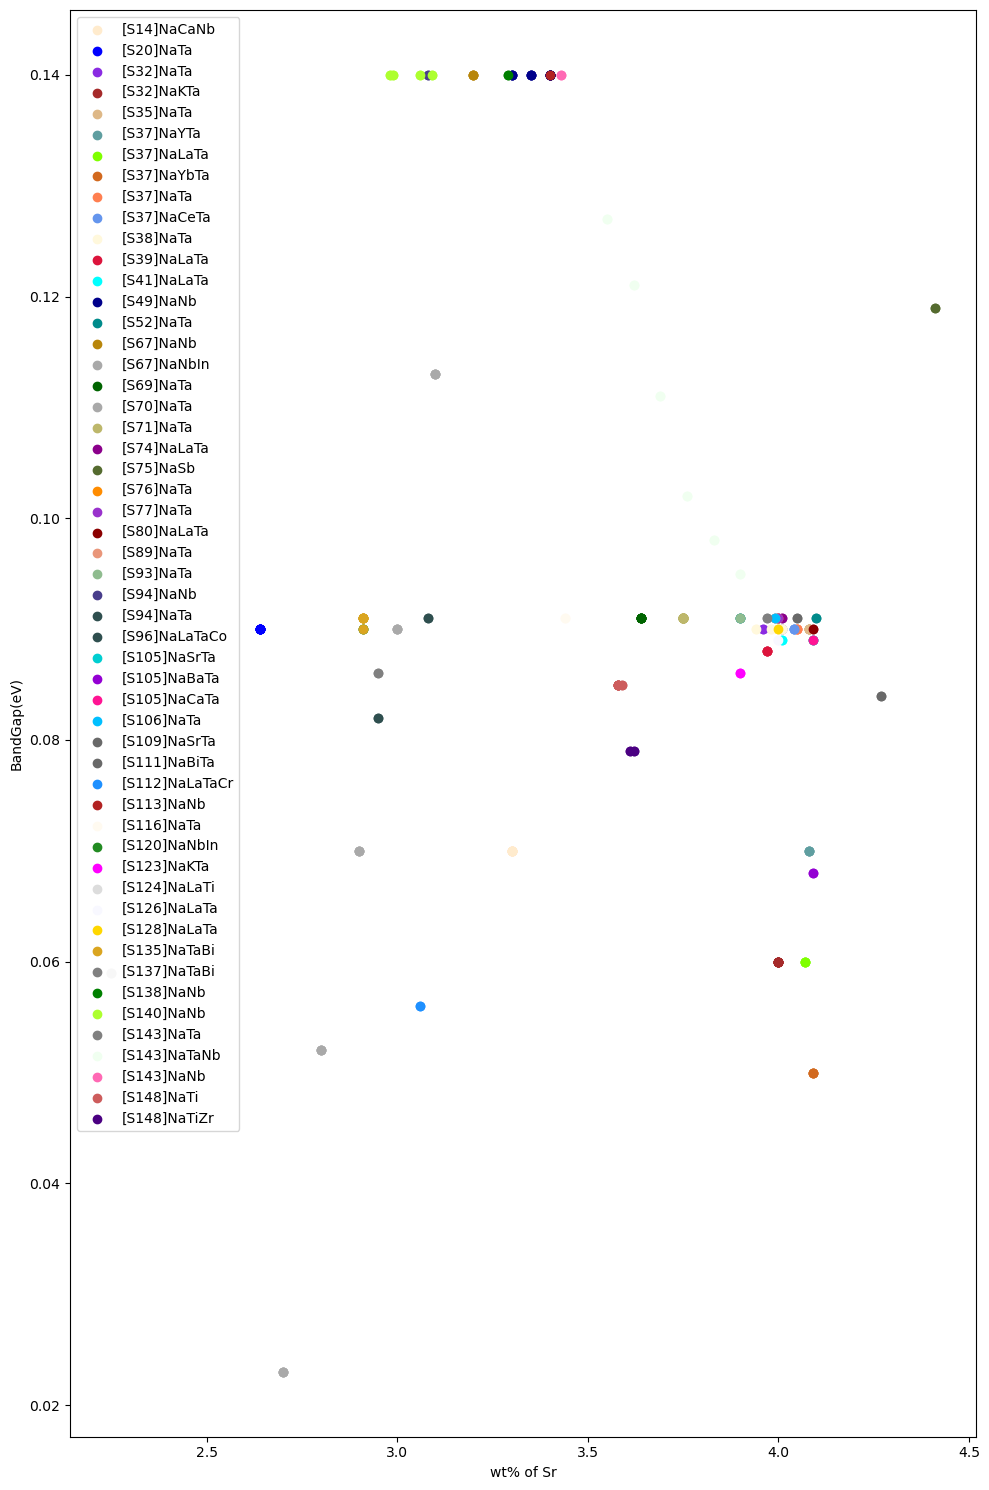

In [73]:
A_scatter(df,'Na',15)

In [108]:
###### pairwise correlatonをLabelごとにやる
print(dic_A_label_list.keys())
df[df["Label"] == dic_A_label_list["Sr"][2]].loc[:,["A mole","B mole","X mole","CalcT",
                                                    "BandGap","Surface Area","ProdRate"]].corr()

df[df["Label"] == dic_A_label_list["Sr"][2]]

dict_keys(['Ag', 'Li', 'Co', 'In', 'Cr', 'Zn', 'Sb', 'Cu', 'Bi', 'Ni', 'Na', 'Ca', 'Ba', 'Sr', 'Ga', 'Mn', 'La', 'Sm', 'Y', 'K'])


,Ref,A,A1,A2,B,B1,B2,X,X1,A mole,A1 mole,A2 mole,B mole,B1 mole,B2 mole,X mole,X1 mole,Prep Meth,CalcT,Calc,Prom Meth,Promoter,Prom,Crystal,BandGap,Surface Area,CatW,Alcohol%,Sac. Agent1,Sac. Agent2,Light,Power,Wave,ProdRate,Label
8,[S3],Sr,La,non,Ti,Cr,non,O,NaN,0.475,0.004,NaN,0.260,0.001,NaN,0.260,NaN,HT,NaN,NaN,PD,Pt,0.5,cubic,2.95,NaN,0.5,20.0,NaN,NaN,Xe,300.0,420.0,66.0,SrLaTiCrO
9,[S3],Sr,La,non,Ti,Cr,non,O,NaN,0.473,0.007,NaN,0.258,0.003,NaN,0.259,NaN,HT,NaN,NaN,PD,Pt,0.5,cubic,2.90,NaN,0.5,20.0,NaN,NaN,Xe,300.0,420.0,75.0,SrLaTiCrO
10,[S3],Sr,La,non,Ti,Cr,non,O,NaN,0.468,0.015,NaN,0.256,0.006,NaN,0.256,NaN,HT,NaN,NaN,PD,Pt,0.5,cubic,2.92,NaN,0.5,20.0,NaN,NaN,Xe,300.0,420.0,76.0,SrLaTiCrO
11,[S3],Sr,La,non,Ti,Cr,non,O,NaN,0.465,0.018,NaN,0.254,0.007,NaN,0.255,NaN,HT,NaN,NaN,PD,Pt,0.5,cubic,2.80,NaN,0.5,20.0,NaN,NaN,Xe,300.0,420.0,90.0,SrLaTiCrO
12,[S3],Sr,La,non,Ti,Cr,non,O,NaN,0.463,0.022,NaN,0.253,0.008,NaN,0.254,NaN,HT,NaN,NaN,PD,Pt,0.5,cubic,2.85,NaN,0.5,20.0,NaN,NaN,Xe,300.0,420.0,71.0,SrLaTiCrO
13,[S3],Sr,La,non,Ti,Cr,non,O,NaN,0.458,0.029,NaN,0.250,0.011,NaN,0.251,NaN,HT,NaN,NaN,PD,Pt,0.5,cubic,2.90,NaN,0.5,20.0,NaN,NaN,Xe,300.0,420.0,39.0,SrLaTiCrO
499,[S146],Sr,La,non,Ti,Cr,non,O,NaN,0.417,0.073,NaN,0.228,0.028,NaN,0.254,NaN,HT,473.0,48.0,impreg,Pt,1.0,cubic,2.31,7.0301,1.0,10.0,NaOH,NaN,Xe,300.0,250.0,64.0,SrLaTiCrO
500,[S146],Sr,La,non,Ti,Cr,non,O,NaN,0.417,0.073,NaN,0.228,0.028,NaN,0.254,NaN,HT,473.0,48.0,impreg,Pt,1.0,cubic,2.31,7.0301,1.0,10.0,NaOH,NaN,Xe,300.0,400.0,28.8,SrLaTiCrO


In [ ]:
###### pairwisecorrelatonをheatmaで

import matplotlib.cm as cm
plt.rcParams['font.family'] = 'Times New Roman'
import seaborn as sns

sns.set(style="white")
corr = df.corr()

